** Deep Learning : Transfer Learning for Image Classification**


In [ ]:
# data visualization and manipulation
import matplotlib.pyplot as plt

# model selection 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve,roc_auc_score, classification_report, ConfusionMatrixDisplay
#from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# preprocess
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from keras.utils import to_categorical

import tensorflow as tf

import cv2
import numpy as np  
from tqdm import tqdm
import os
                
from random import shuffle  
from PIL import Image

import numpy as np # linear algebra

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

path_daisy = "drive/MyDrive/flowers/daisy"
path_dandelion = "drive/MyDrive/flowers/dandelion"
path_rose = "drive/MyDrive/flowers/rose"
path_sunflower = "drive/MyDrive/flowers/sunflower"
path_tulip = "drive/MyDrive/flowers/tulip"

Mounted at /content/drive


In [ ]:
def assign_label(img, flower_type):
    return flower_type

def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (160,160))
        
        X.append(np.array(img))
        Z.append(str(label))

In [ ]:
X = []
Z = []

make_train_data("Daisy",path_daisy)
print(len(X))

make_train_data("Dandelion",path_dandelion)
print(len(X))

make_train_data("Rose",path_rose)
print(len(X))

make_train_data("Sunflower",path_sunflower)
print(len(X))

make_train_data("Tulip",path_tulip)
print(len(X))

100%|██████████| 764/764 [00:14<00:00, 53.29it/s] 


764


100%|██████████| 1052/1052 [00:39<00:00, 26.69it/s] 


1816


100%|██████████| 784/784 [00:13<00:00, 56.85it/s] 


2600


100%|██████████| 733/733 [00:14<00:00, 50.29it/s] 


3333


100%|██████████| 984/984 [00:20<00:00, 47.09it/s] 

4317


In [ ]:
# Label Encoding the Y array (i.e. Daisy->0, Rose->1 etc...) & then One Hot Encoding
labelEncoder = LabelEncoder()
Y = labelEncoder.fit_transform(Z)
Y = to_categorical(Y,5)
X = np.array(X)
X = X/ 255


In [ ]:
x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(X, Y, Z, test_size = 0.2, random_state=42)

print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)



x_train shape:  (3453, 160, 160, 3)
x_test shape:  (864, 160, 160, 3)
y_train shape:  (3453, 5)
y_test shape:  (864, 5)


In [ ]:
# data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,   # set each sample mean to 0
    featurewise_std_normalization=False,   # divide inputs by std of the dataset
    samplewise_std_normalization= False,   # divide each input by its std
    zca_whitening=False,   # dimesion reduction
    rotation_range=10,    # randomly rotate images in the range 10 degrees
    zoom_range=0.1,      # Randomly zoom image 10%
    width_shift_range=0.2,   # randomly shift images horizontally 20%
    height_shift_range=0.2,   # randomly shift images vertically 20%
    horizontal_flip=True,     # randomly flip images
    vertical_flip=False    # randomly flip images
)
datagen.fit(x_train)

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (160,160,3), include_top = False, weights = "imagenet")
base_model.trainable = False

model = tf.keras.Sequential([base_model,
                             tf.keras.layers.GlobalAveragePooling2D(),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(5, activation = "softmax"
                             )])

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
# Epochs and Batch Size
epochs = 50
batch_size = 32

# Compiling the Keras Model 
model.compile(optimizer=Adam(learning_rate=0.01), loss="categorical_crossentropy", metrics = ["accuracy"])

# summary
#model.summary()

**Training**

In [ ]:
from time import time
start = time()

# Fitting on the Training set and making predcitons on the Validation set
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size = batch_size), 
                              epochs= epochs, 
                              validation_data=(x_test,y_test), 
                              verbose = 1, 
                              steps_per_epoch=x_train.shape[0] // batch_size)

print("Time taken to train the Neural Net : ",time()-start)

<ipython-input-10-cb3adc43da2b>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train,y_train, batch_size = batch_size),


Epoch 1/50
107/107 [==============================] - 107s 963ms/step - loss: 1.0583 - accuracy: 0.7024 - val_loss: 0.6497 - val_accuracy: 0.7928
Epoch 2/50
107/107 [==============================] - 102s 957ms/step - loss: 0.7684 - accuracy: 0.7860 - val_loss: 0.7360 - val_accuracy: 0.8044
Epoch 3/50
107/107 [==============================] - 103s 958ms/step - loss: 0.8506 - accuracy: 0.7805 - val_loss: 0.9184 - val_accuracy: 0.8032
Epoch 4/50
107/107 [==============================] - 104s 965ms/step - loss: 0.8443 - accuracy: 0.7887 - val_loss: 0.9305 - val_accuracy: 0.8032
Epoch 5/50
107/107 [==============================] - 97s 904ms/step - loss: 0.7872 - accuracy: 0.8097 - val_loss: 0.8097 - val_accuracy: 0.8102
Epoch 6/50
107/107 [==============================] - 103s 962ms/step - loss: 0.7916 - accuracy: 0.8123 - val_loss: 0.7764 - val_accuracy: 0.8426
Epoch 7/50
107/107 [==============================] - 102s 944ms/step - loss: 0.8742 - accuracy: 0.8030 - val_loss: 0.8447 - 

**Test & Evaluation**

MODEL NAME <--->  <keras.engine.sequential.Sequential object at 0x7fe288688c10>


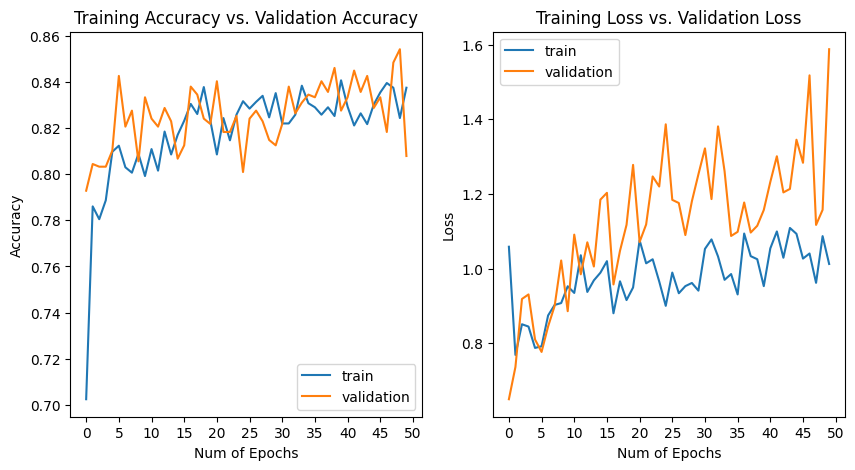

In [ ]:
print("MODEL NAME <---> ",model)
plt.figure(figsize=(10, 5))
  
# summarize history for accuracy
plt.subplot(1, 2 ,1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xticks(np.arange(0, epochs+1, epochs/10))
plt.title('Training Accuracy vs. Validation Accuracy')
plt.xlabel('Num of Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='best')
  
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xticks(np.arange(0, epochs+1, epochs/10))
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Num of Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='best')
  
plt.show()

**Plotting the Metrics**

27/27 [==============================] - 17s 587ms/step
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       162
           1       0.96      0.74      0.83       223
           2       0.75      0.83      0.79       155
           3       0.70      0.92      0.80       135
           4       0.85      0.74      0.79       189

    accuracy                           0.81       864
   macro avg       0.81      0.82      0.81       864
weighted avg       0.82      0.81      0.81       864

[[141   2   2  13   4]
 [ 27 164   3  25   4]
 [  6   1 129   5  14]
 [  1   3   5 124   2]
 [  6   1  33   9 140]]


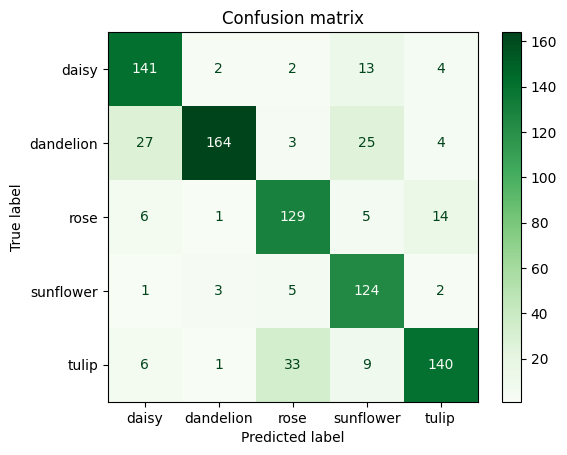

In [ ]:
from sklearn import metrics
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis = -1)
predictions = predictions.reshape(1,-1)[0]

labelEncoder.fit_transform(z_test)

print(metrics.classification_report(labelEncoder.fit_transform(z_test), predictions))

print(confusion_matrix(labelEncoder.fit_transform(z_test), predictions))

ConfusionMatrixDisplay.from_predictions(labelEncoder.fit_transform(z_test), predictions, cmap=plt.cm.Greens, display_labels=['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'])
plt.title('Confusion matrix')
plt.show()